Hours: 1, Logit: -4.118, Prob: 0.016, Predicted: 0
Hours: 2, Logit: -2.939, Prob: 0.050, Predicted: 0
Hours: 3, Logit: -1.761, Prob: 0.147, Predicted: 0
Hours: 4, Logit: -0.583, Prob: 0.358, Predicted: 0
Hours: 5, Logit: 0.595, Prob: 0.644, Predicted: 1
Hours: 6, Logit: 1.773, Prob: 0.855, Predicted: 1
Hours: 7, Logit: 2.951, Prob: 0.950, Predicted: 1
Hours: 8, Logit: 4.129, Prob: 0.984, Predicted: 1
Hours: 9, Logit: 5.307, Prob: 0.995, Predicted: 1


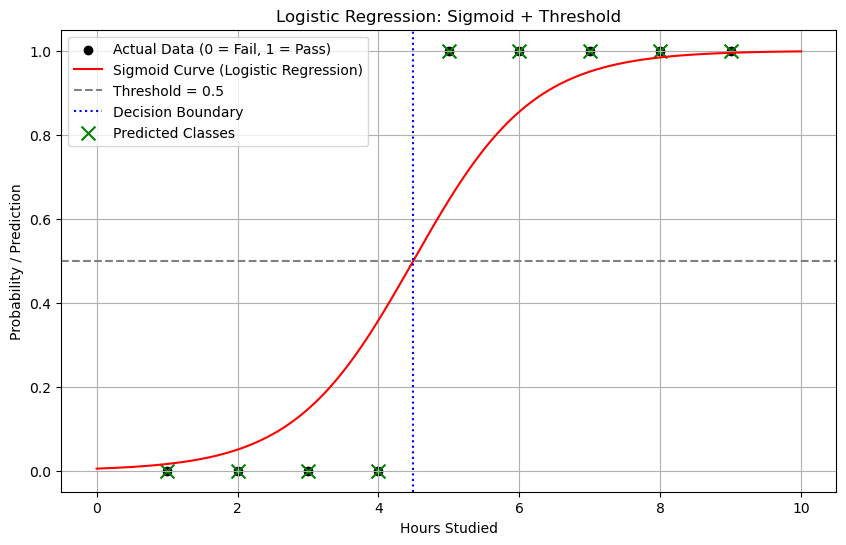

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit  # sigmoid function

# Step 1: Data (Hours studied vs Pass (1) / Fail (0))
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

# Step 2: Fit Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Step 3: Get raw scores (logits)
logits = log_reg.decision_function(X)  # These are z = w*x + b

# Step 4: Apply sigmoid (expit) to get probabilities
probabilities = expit(logits)

# Step 5: Apply threshold
threshold = 0.5
predictions = (probabilities >= threshold).astype(int)

# Print sample results
for i in range(len(X)):
    print(f"Hours: {X[i][0]}, Logit: {logits[i]:.3f}, Prob: {probabilities[i]:.3f}, Predicted: {predictions[i]}")

# Step 6: Plot
x_range = np.linspace(0, 10, 300).reshape(-1, 1)
z_range = log_reg.decision_function(x_range)
prob_range = expit(z_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Actual Data (0 = Fail, 1 = Pass)')
plt.plot(x_range, prob_range, color='red', label='Sigmoid Curve (Logistic Regression)')
plt.axhline(y=threshold, color='gray', linestyle='--', label='Threshold = 0.5')
plt.axvline(x=log_reg.intercept_ / -log_reg.coef_[0], color='blue', linestyle=':', label='Decision Boundary')
plt.scatter(X, predictions, color='green', marker='x', s=100, label='Predicted Classes')
plt.xlabel("Hours Studied")
plt.ylabel("Probability / Prediction")
plt.title("Logistic Regression: Sigmoid + Threshold")
plt.legend()
plt.grid(True)
plt.show()
